In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("E:\\J P Morgan Quantitative Research\\Task4.csv")
df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


In [5]:
K = 5  # num of buckets
df['fico_bucket'] = pd.qcut(df['fico_score'], K, labels=False)
df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,fico_bucket
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,1
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,0
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,1
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,1
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,2
...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0,4
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0,1
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0,1
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0,2


In [7]:
# Check boundaries used by qcut
bins = pd.qcut(df['fico_score'], K, retbins=True)[1]
print("Quantile Bucket Boundaries:", bins)


Quantile Bucket Boundaries: [408. 587. 623. 653. 688. 850.]


In [9]:
# Aggregate default stats by bucket
bucket_summary = (
    df.groupby('fico_bucket')['default']
    .agg(['count', 'sum'])
    .rename(columns={'count': 'Total_Borrowers', 'sum': 'Defaults'})
)

bucket_summary['PD (%)'] = (bucket_summary['Defaults'] / bucket_summary['Total_Borrowers']) * 100
bucket_summary = bucket_summary.round(2).reset_index()
print(bucket_summary)


   fico_bucket  Total_Borrowers  Defaults  PD (%)
0            0             2050       817   39.85
1            1             1971       425   21.56
2            2             1989       301   15.13
3            3             1997       200   10.02
4            4             1993       108    5.42


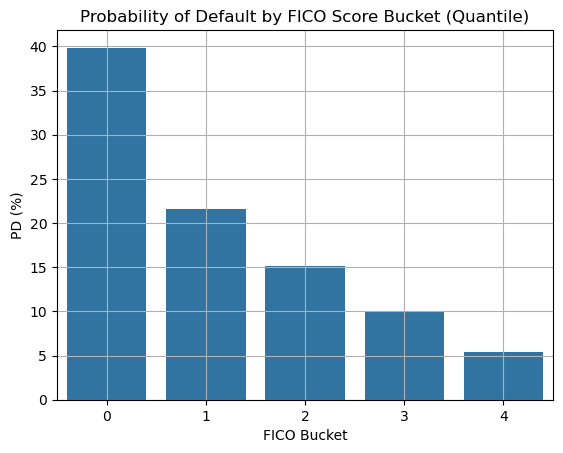

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='fico_bucket', y='PD (%)', data=bucket_summary)
plt.title("Probability of Default by FICO Score Bucket (Quantile)")
plt.xlabel("FICO Bucket")
plt.ylabel("PD (%)")
plt.grid(True)
plt.show()


##  Interpretation: Default Rate by Quantile-Based FICO Buckets

The table below summarizes the performance of quantile-based bucketing applied to FICO scores using `pd.qcut`:

| FICO Bucket | Total Borrowers | Defaults | PD (%) |
|-------------|------------------|----------|--------|
| 0 (Lowest FICO) | 2050             | 817      | 39.85% |
| 1               | 1971             | 425      | 21.56% |
| 2               | 1989             | 301      | 15.13% |
| 3               | 1997             | 200      | 10.02% |
| 4 (Highest FICO)| 1993             | 108      | 5.42 |

### 🔍 Key Insights:
There is a **clear inverseelationship** between FICO score and default probabity.
- The **lowest FICO buct (Bucket)** has the **highesdefault rate** (≈ 40%), indicating high credit risk.
- Cversely, the **highest FICO buet (Bucke4)** has the **lowe default rate** (≈ 5%), showing strong creditworthiness.
- This validates FICO's predictive power in distinguishing risk tiers and confirms the effectiveness of quantile-based bucketing for credit modelng tasks.

### ✅ Conclusion:
Quantile binning successfully creates risk-segmented buckets where default rates decrease with higher credit scores. These buckets can now be used as categorical inputs for models that require discrete risk levels.
